# Predict FR


In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import hoggorm as ho
import hoggormplot as hopl
np.bool = np.bool_
from scipy import stats
from sklearn.preprocessing import StandardScaler
from matplotlib.axes import Axes
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

C:\Users\marth\anaconda3\envs\inf200\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\marth\anaconda3\envs\inf200\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
C:\Users\marth\AppData\Local\Temp/ipykernel_3176/3837164555.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# untreated, no mortar removed
#df = pd.read_excel('ABCD normally distributed dataset from untreated brick with mortar SNV spectra.xlsx')

# dried, no mortar removed
#df = pd.read_excel(r'ABCD normally distributed dataset from dried with mortar SNV spectra.xlsx')


# Load the untreated, mortar removed data
#df = pd.read_excel('ABCD normally distributed dataset from untreated no mortar SNV spectra.xlsx')

# Load dried spectra, with mortar removal, split ABCD
df = pd.read_excel('ABCD normally distributed dataset from dried no mortar SNV spectra.xlsx')

df = df.iloc[:, 1:]
df

,953,959,964,970,975,981,986,991,997,1002,...,group,brick_id,Dry density,Water absorption,PN,Minute suction,Max force kN,Compressive strength MPa,FR,FR calculated
0,4.564952,4.425837,4.288240,4.148088,4.004263,3.854006,3.702563,3.548011,3.394499,3.239871,...,1,A9_B,1941.658716,10.128325,0.720700,2.175250,599.861009,15.745281,0.574394,0.547439
1,4.166178,4.042790,3.920336,3.794294,3.662620,3.523419,3.380742,3.235313,3.089030,2.941246,...,1,A9_B,1945.953933,9.752222,0.714242,2.251885,399.781097,19.514794,0.585249,0.550790
2,4.365933,4.235829,4.106800,3.974876,3.837642,3.694337,3.547977,3.399301,3.250602,3.100934,...,1,A9_B,1941.999514,9.322421,0.711291,2.240755,560.500889,20.702189,0.563730,0.548271
3,4.475484,4.347092,4.219944,4.089712,3.955436,3.814415,3.671810,3.525949,3.380619,3.233716,...,1,A9_B,1949.637277,9.786022,0.719664,2.339518,491.831734,23.256277,0.596492,0.564598
4,4.167475,4.054071,3.941422,3.824565,3.701470,3.570901,3.436358,3.298501,3.159665,3.018803,...,1,A9_B,1938.356678,9.628847,0.719171,2.213399,465.664725,21.117134,0.548652,0.551987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,0.925933,0.812140,0.698517,0.582075,0.465935,0.350932,0.245844,0.142975,0.050000,-0.034089,...,9,FV6_A,2112.020016,7.979467,0.761022,0.716667,1508.447192,56.044713,0.313599,0.305041
1460,3.605123,3.481163,3.357489,3.231244,3.094204,2.946122,2.796618,2.651848,2.509309,2.368961,...,9,FV6_A,2130.772255,7.582548,0.795226,0.538106,1520.919744,63.770995,0.330191,0.273771
1461,1.040879,0.971682,0.902594,0.830338,0.767414,0.704992,0.646425,0.587726,0.537312,0.491268,...,9,FV6_A,2106.479201,6.947556,0.793975,0.290903,1505.203954,56.008320,0.299685,0.203294
1462,1.085196,1.012857,0.940619,0.867648,0.794280,0.720073,0.652334,0.587969,0.528217,0.476769,...,9,FV6_A,2104.541695,7.077607,0.805634,0.694875,1354.935202,58.597718,0.329550,0.319105


# Preprocess the spectral data

Remove outliers by zscore

Remove BB20_A and SVB5_B

Reset indecies



In [3]:
remove = df[(df.brick_id == 'BB20_A') | (df.brick_id == 'SVB5_A')].index
df = df.drop(remove)
df = df.reset_index(drop=True)
df

,953,959,964,970,975,981,986,991,997,1002,...,group,brick_id,Dry density,Water absorption,PN,Minute suction,Max force kN,Compressive strength MPa,FR,FR calculated
0,4.564952,4.425837,4.288240,4.148088,4.004263,3.854006,3.702563,3.548011,3.394499,3.239871,...,1,A9_B,1941.658716,10.128325,0.720700,2.175250,599.861009,15.745281,0.574394,0.547439
1,4.166178,4.042790,3.920336,3.794294,3.662620,3.523419,3.380742,3.235313,3.089030,2.941246,...,1,A9_B,1945.953933,9.752222,0.714242,2.251885,399.781097,19.514794,0.585249,0.550790
2,4.365933,4.235829,4.106800,3.974876,3.837642,3.694337,3.547977,3.399301,3.250602,3.100934,...,1,A9_B,1941.999514,9.322421,0.711291,2.240755,560.500889,20.702189,0.563730,0.548271
3,4.475484,4.347092,4.219944,4.089712,3.955436,3.814415,3.671810,3.525949,3.380619,3.233716,...,1,A9_B,1949.637277,9.786022,0.719664,2.339518,491.831734,23.256277,0.596492,0.564598
4,4.167475,4.054071,3.941422,3.824565,3.701470,3.570901,3.436358,3.298501,3.159665,3.018803,...,1,A9_B,1938.356678,9.628847,0.719171,2.213399,465.664725,21.117134,0.548652,0.551987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,0.925933,0.812140,0.698517,0.582075,0.465935,0.350932,0.245844,0.142975,0.050000,-0.034089,...,9,FV6_A,2112.020016,7.979467,0.761022,0.716667,1508.447192,56.044713,0.313599,0.305041
1436,3.605123,3.481163,3.357489,3.231244,3.094204,2.946122,2.796618,2.651848,2.509309,2.368961,...,9,FV6_A,2130.772255,7.582548,0.795226,0.538106,1520.919744,63.770995,0.330191,0.273771
1437,1.040879,0.971682,0.902594,0.830338,0.767414,0.704992,0.646425,0.587726,0.537312,0.491268,...,9,FV6_A,2106.479201,6.947556,0.793975,0.290903,1505.203954,56.008320,0.299685,0.203294
1438,1.085196,1.012857,0.940619,0.867648,0.794280,0.720073,0.652334,0.587969,0.528217,0.476769,...,9,FV6_A,2104.541695,7.077607,0.805634,0.694875,1354.935202,58.597718,0.329550,0.319105


In [4]:
zdata = df[(np.abs(stats.zscore(df.iloc[:, :288])) < 3).all(axis=1)]  # eller bruk any
zdata = zdata.reset_index(drop=True)

spectral_data = zdata.iloc[:, :288]
group_ids = list(zdata["group"])
brick_ids = list(zdata["brick_id"])

spectral_data

,953,959,964,970,975,981,986,991,997,1002,...,2467,2472,2478,2483,2489,2494,2499,2505,2510,2516
0,4.564952,4.425837,4.288240,4.148088,4.004263,3.854006,3.702563,3.548011,3.394499,3.239871,...,0.528312,0.581254,0.632243,0.681713,0.728757,0.775475,0.822141,0.869620,0.918052,0.966670
1,4.166178,4.042790,3.920336,3.794294,3.662620,3.523419,3.380742,3.235313,3.089030,2.941246,...,1.274147,1.351176,1.424914,1.493582,1.554828,1.610352,1.660244,1.706270,1.750145,1.794138
2,4.365933,4.235829,4.106800,3.974876,3.837642,3.694337,3.547977,3.399301,3.250602,3.100934,...,0.957799,1.026042,1.090652,1.151935,1.208206,1.260416,1.310409,1.358614,1.405342,1.452210
3,4.475484,4.347092,4.219944,4.089712,3.955436,3.814415,3.671810,3.525949,3.380619,3.233716,...,0.531038,0.586444,0.639994,0.691965,0.741062,0.789697,0.837400,0.885350,0.934352,0.983538
4,4.167475,4.054071,3.941422,3.824565,3.701470,3.570901,3.436358,3.298501,3.159665,3.018803,...,1.145872,1.221252,1.293840,1.361641,1.422207,1.477998,1.527884,1.573978,1.617804,1.661744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,2.972951,2.822645,2.672653,2.517546,2.377335,2.234834,2.097749,1.959231,1.836608,1.715834,...,0.627846,0.799450,0.961919,1.122696,1.278422,1.429274,1.573976,1.707773,1.843569,1.979621
1256,2.244685,2.169124,2.093671,2.014500,1.931223,1.838776,1.750323,1.663413,1.583279,1.508199,...,-0.258532,-0.165347,-0.082371,-0.013220,0.047829,0.085457,0.097824,0.076677,0.041876,0.007097
1257,1.187327,1.119849,1.052435,0.982029,0.899601,0.807200,0.714498,0.627772,0.545447,0.469897,...,-0.394659,-0.265961,-0.153936,-0.069898,-0.002819,0.030380,0.020390,-0.033482,-0.104812,-0.176072
1258,3.605123,3.481163,3.357489,3.231244,3.094204,2.946122,2.796618,2.651848,2.509309,2.368961,...,-0.027545,0.067728,0.153880,0.221076,0.277366,0.307393,0.308711,0.279292,0.239207,0.199152


In [5]:
spectral_data = spectral_data.iloc[:,20:]
spectral_data = spectral_data.iloc[:, :-20]
spectral_data

,1062,1068,1073,1079,1084,1089,1095,1100,1106,1111,...,2358,2363,2369,2374,2380,2385,2391,2396,2401,2407
0,1.744566,1.631853,1.524010,1.417335,1.314425,1.214227,1.118951,1.027436,0.941526,0.858801,...,-0.270526,-0.263761,-0.251745,-0.233891,-0.211298,-0.184049,-0.153588,-0.119331,-0.082081,-0.040808
1,1.463717,1.350071,1.240531,1.132891,1.028580,0.926922,0.829383,0.735591,0.646862,0.561571,...,0.129046,0.132945,0.145795,0.168932,0.201250,0.241630,0.287518,0.338168,0.393329,0.453060
2,1.629454,1.517245,1.408810,1.302585,1.200637,1.101526,1.006765,0.915175,0.828452,0.744324,...,-0.060102,-0.056553,-0.045889,-0.025713,0.001863,0.036066,0.075533,0.120262,0.168128,0.220863
3,1.785482,1.674163,1.567261,1.461352,1.359154,1.259299,1.164010,1.072343,0.986224,0.903004,...,-0.267071,-0.262382,-0.252293,-0.235639,-0.213636,-0.186974,-0.157118,-0.123401,-0.086854,-0.046349
4,1.576216,1.462705,1.352908,1.244983,1.140070,1.037931,0.939626,0.844842,0.754418,0.667345,...,0.069744,0.070568,0.079647,0.099248,0.127754,0.164694,0.206753,0.254252,0.305939,0.362449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0.978303,0.947799,0.920407,0.883148,0.846815,0.810284,0.777753,0.754822,0.742857,0.733847,...,-1.710655,-1.733140,-1.734413,-1.714414,-1.670096,-1.603571,-1.522017,-1.421896,-1.312720,-1.187152
1256,1.060103,1.044847,1.029429,1.011778,0.997389,0.985248,0.973983,0.967522,0.965180,0.963174,...,-1.802658,-1.831620,-1.845212,-1.837637,-1.812484,-1.768414,-1.708743,-1.640124,-1.563946,-1.474503
1257,0.112993,0.108959,0.106214,0.104379,0.105273,0.110279,0.118223,0.125203,0.138763,0.149604,...,-2.049877,-2.116881,-2.161614,-2.181722,-2.174929,-2.141745,-2.093136,-2.029563,-1.952675,-1.862464
1258,1.272458,1.207592,1.143939,1.083807,1.030244,0.978931,0.927939,0.882268,0.839943,0.798272,...,-1.686720,-1.700149,-1.700751,-1.682707,-1.651552,-1.605380,-1.545222,-1.475106,-1.397284,-1.304893


# Focus on FR
Retrieve the FR data and combine with the spectra 

Run a PCA just to see correlation


In [6]:
fr_df = spectral_data
fr_df['FR'] = zdata['FR calculated']
fr_df

,1062,1068,1073,1079,1084,1089,1095,1100,1106,1111,...,2363,2369,2374,2380,2385,2391,2396,2401,2407,FR
0,1.744566,1.631853,1.524010,1.417335,1.314425,1.214227,1.118951,1.027436,0.941526,0.858801,...,-0.263761,-0.251745,-0.233891,-0.211298,-0.184049,-0.153588,-0.119331,-0.082081,-0.040808,0.547439
1,1.463717,1.350071,1.240531,1.132891,1.028580,0.926922,0.829383,0.735591,0.646862,0.561571,...,0.132945,0.145795,0.168932,0.201250,0.241630,0.287518,0.338168,0.393329,0.453060,0.550790
2,1.629454,1.517245,1.408810,1.302585,1.200637,1.101526,1.006765,0.915175,0.828452,0.744324,...,-0.056553,-0.045889,-0.025713,0.001863,0.036066,0.075533,0.120262,0.168128,0.220863,0.548271
3,1.785482,1.674163,1.567261,1.461352,1.359154,1.259299,1.164010,1.072343,0.986224,0.903004,...,-0.262382,-0.252293,-0.235639,-0.213636,-0.186974,-0.157118,-0.123401,-0.086854,-0.046349,0.564598
4,1.576216,1.462705,1.352908,1.244983,1.140070,1.037931,0.939626,0.844842,0.754418,0.667345,...,0.070568,0.079647,0.099248,0.127754,0.164694,0.206753,0.254252,0.305939,0.362449,0.551987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0.978303,0.947799,0.920407,0.883148,0.846815,0.810284,0.777753,0.754822,0.742857,0.733847,...,-1.733140,-1.734413,-1.714414,-1.670096,-1.603571,-1.522017,-1.421896,-1.312720,-1.187152,0.282244
1256,1.060103,1.044847,1.029429,1.011778,0.997389,0.985248,0.973983,0.967522,0.965180,0.963174,...,-1.831620,-1.845212,-1.837637,-1.812484,-1.768414,-1.708743,-1.640124,-1.563946,-1.474503,0.345340
1257,0.112993,0.108959,0.106214,0.104379,0.105273,0.110279,0.118223,0.125203,0.138763,0.149604,...,-2.116881,-2.161614,-2.181722,-2.174929,-2.141745,-2.093136,-2.029563,-1.952675,-1.862464,0.276013
1258,1.272458,1.207592,1.143939,1.083807,1.030244,0.978931,0.927939,0.882268,0.839943,0.798272,...,-1.700149,-1.700751,-1.682707,-1.651552,-1.605380,-1.545222,-1.475106,-1.397284,-1.304893,0.273771


In [208]:
fr_df.query('FR < 0')

,1062,1068,1073,1079,1084,1089,1095,1100,1106,1111,...,2369,2374,2380,2385,2391,2396,2401,2407,FR,normalized fr


loo


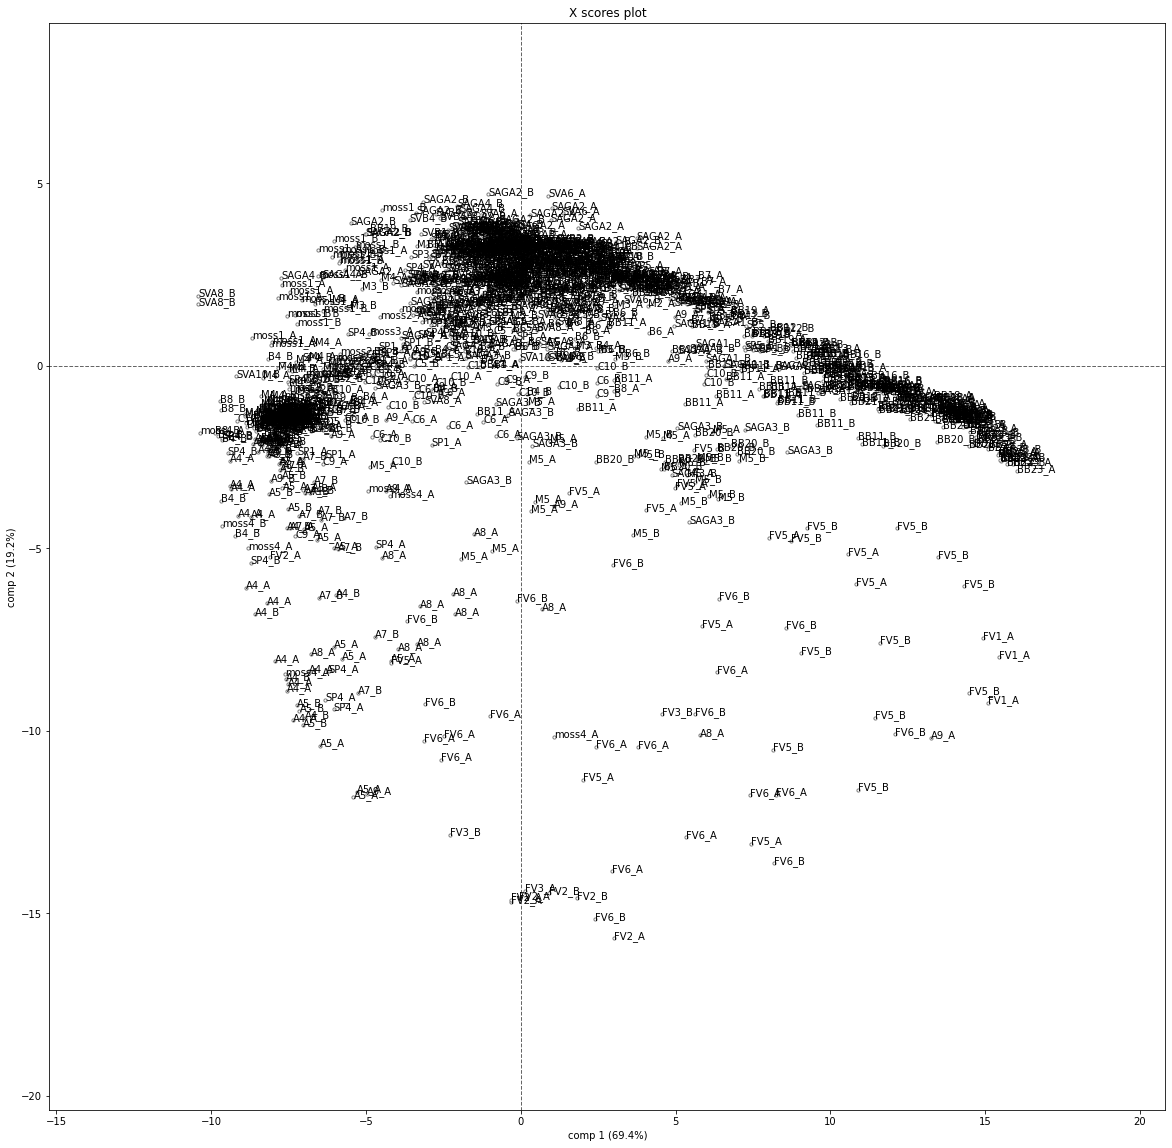

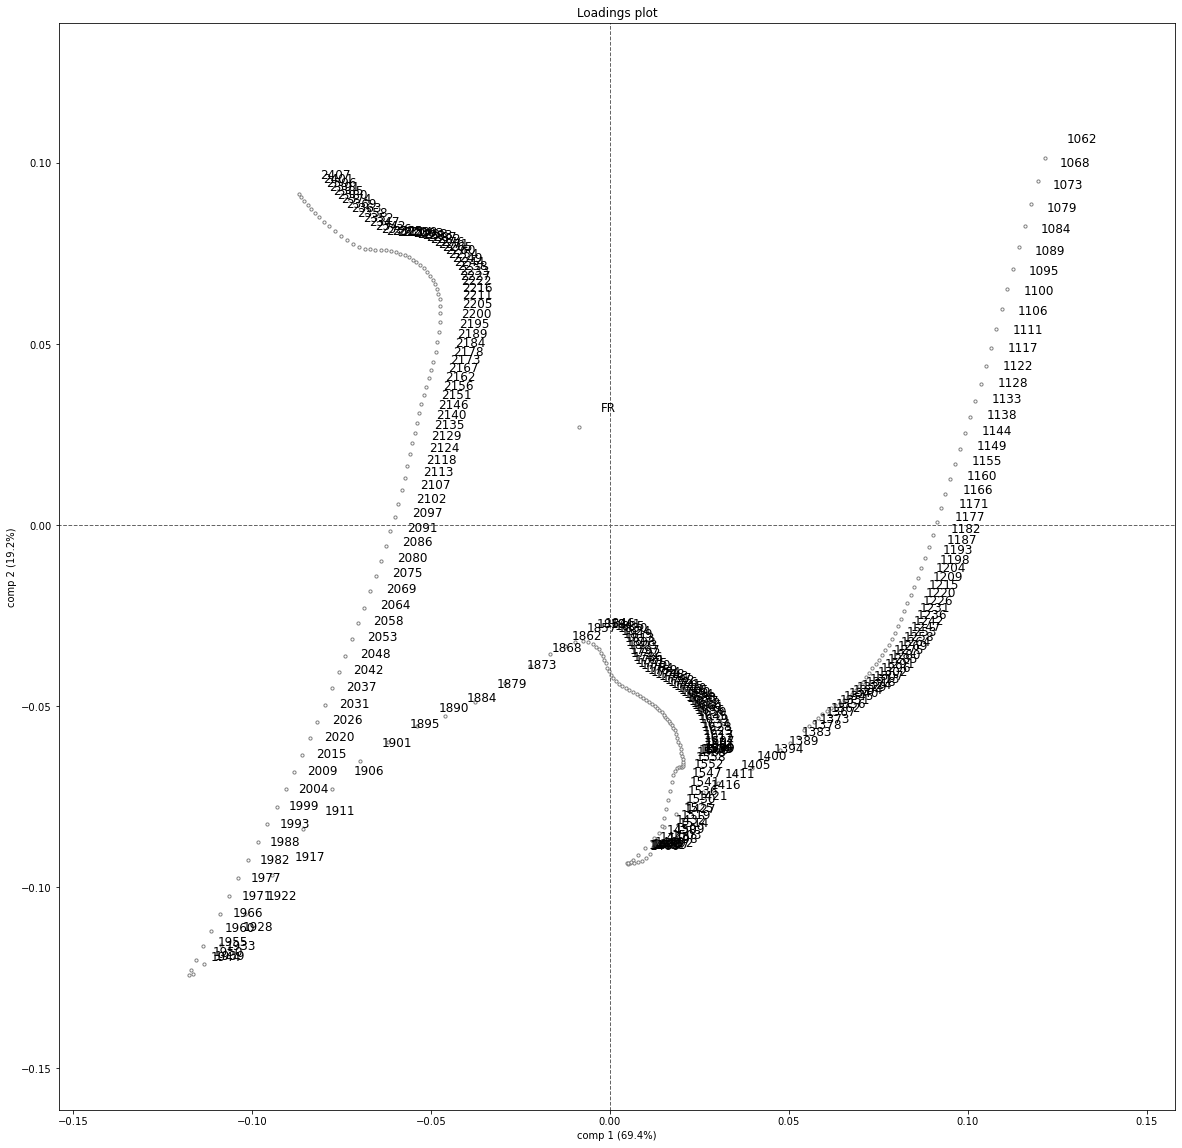

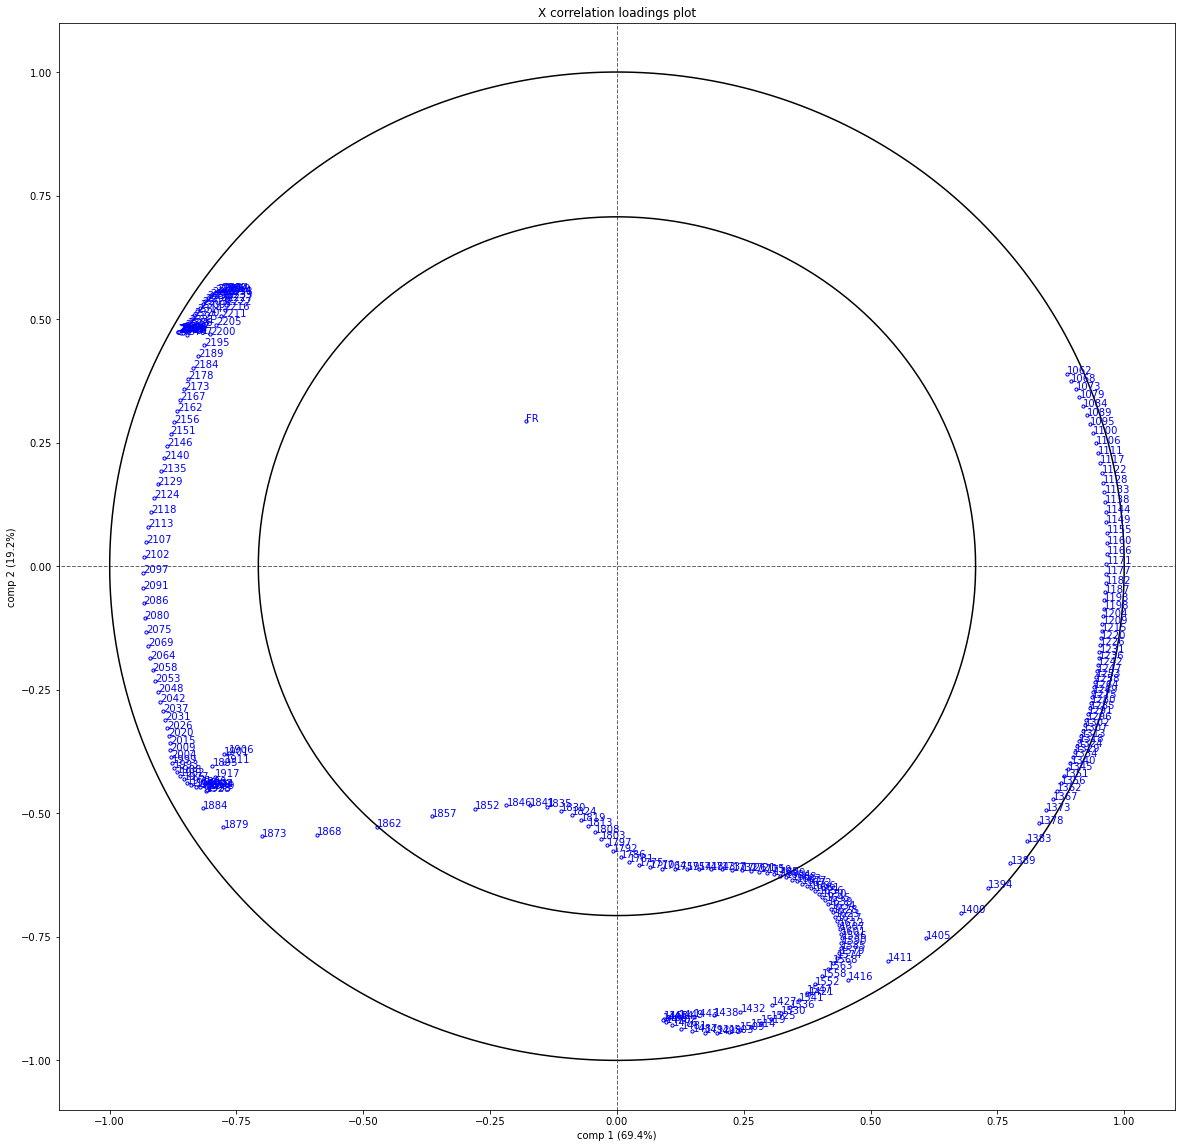

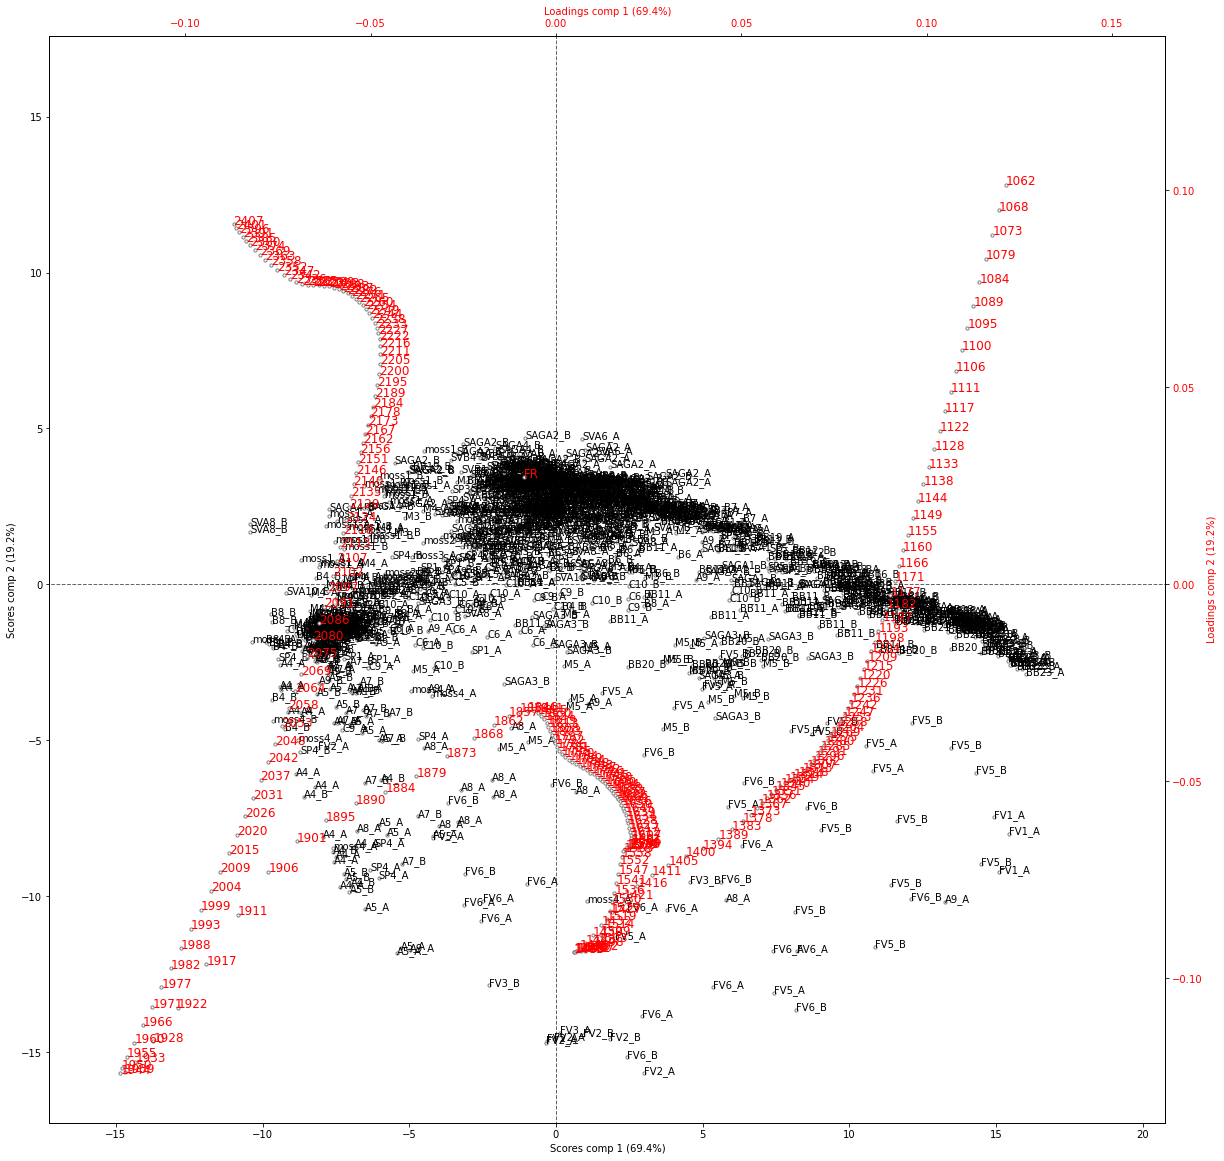

In [240]:
data_vals= fr_df.values
col_names = list(fr_df.columns)

model = ho.nipalsPCA(arrX=data_vals, numComp=5, Xstand=False, cvType=["loo"])
hopl.plot(model, comp=[1, 2], 
         plots=[1, 2, 3, 4], 
         objNames=brick_ids, 
         XvarNames=col_names, figsize=(20,20))

In [241]:
# Get calibrated explained variance of each component
calExplVar = model.X_calExplVar()

# Get calibrated explained variance and store in pandas dataframe with row and column names
calExplVar_df = pd.DataFrame(model.X_calExplVar())
calExplVar_df.columns = ['calibrated explained variance']
calExplVar_df.index = ['PC{0}'.format(x+1) for x in range(model.X_loadings().shape[1])]
calExplVar_df

,calibrated explained variance
PC1,69.429343
PC2,19.177951
PC3,6.267581
PC4,2.687213
PC5,1.208192


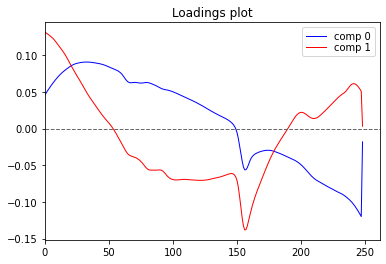

In [10]:
hopl.loadings(model, comp=[0,1], line=True)

In [242]:
loadings = model.X_loadings()
scores = model.X_scores()

In [12]:
# Get loadings and store in pandas dataframe with row and column names
loadings_df = pd.DataFrame(model.X_loadings())
loadings_df.index = col_names
loadings_df.columns = ['PC{0}'.format(x+1) for x in range(model.X_loadings().shape[1])]
loadings_df

,PC1,PC2,PC3,PC4,PC5
1062,0.045777,0.131208,0.009974,0.232868,0.032790
1068,0.048643,0.130142,0.005752,0.212248,0.039133
1073,0.051385,0.128923,0.001711,0.192271,0.045162
1079,0.054042,0.127651,-0.002037,0.172641,0.050802
1084,0.056589,0.126303,-0.005505,0.153758,0.055954
...,...,...,...,...,...
2391,-0.110866,0.058236,-0.018428,-0.067338,-0.100287
2396,-0.113737,0.056171,-0.032883,-0.068558,-0.106264
2401,-0.116742,0.053654,-0.048553,-0.069908,-0.112237
2407,-0.119900,0.050660,-0.065673,-0.071468,-0.118264


C:\Users\marth\AppData\Local\Temp/ipykernel_9960/3193617621.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = plt.cm.get_cmap('tab10', 10)
C:\Users\marth\AppData\Local\Temp/ipykernel_9960/3193617621.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab20c = plt.cm.get_cmap('tab20c', 20)


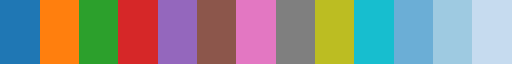

In [14]:
from matplotlib.colors import ListedColormap

# Get colors from tab10 and tab20c colormaps
tab10 = plt.cm.get_cmap('tab10', 10)
tab20c = plt.cm.get_cmap('tab20c', 20)

# Select specific colors from tab20c
#selected_tab10_colors = tab10(np.array([0,1,2,3,5,6,7,8,9]))
selected_tab20c_colors = tab20c(np.array([1, 2, 3]))  # Colors 2, 3, and 4

# Combine selected colors from tab20c with all colors from tab10
#combined_colors = np.vstack((selected_tab10_colors[0], selected_tab20c_colors, selected_tab10_colors[1:]))
combined_colors = np.vstack((tab10.colors, selected_tab20c_colors))
# Create a new colormap
custom_cmap = ListedColormap(combined_colors)
custom_cmap

In [15]:
def biplot_spectra(score, comp1, comp2, loads, labels=None):
    fig = plt.figure(figsize=(15,15))
    rect = 0.1, 0.1, 0.8, 0.8
    ax1 = fig.add_axes(rect)
    
    c1 = comp1 + 1
    c2 = comp2 + 1
  
    scatter = ax1.scatter(score[:, comp1], score[:, comp2], s=100, c=group_ids, cmap=custom_cmap, edgecolor='black', label=group_ids)
    ax1.set_xlabel(f'Score comp {c1}', color='b', fontsize=20)
    ax1.set_ylabel(f'Score comp {c2}', color='b', fontsize=20)
    legend1 = ax1.legend(*scatter.legend_elements(),
                        loc="lower left", title="Brick groups", fontsize=18, title_fontsize=20)
    ax1.add_artist(legend1)
    
    #for i in range(score.shape[0]):
    #    xpos = score[:, comp1][i]-0.5
    #    ypos = score[:, comp2][i]
    #    plt.text(xpos, ypos, brick_ids[i], color='black', ha='right', va='top', fontsize=11)
        
    ax2 = fig.add_axes(rect, frameon=False)
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position('right')
    ax2.xaxis.tick_top()
    ax2.xaxis.set_label_position('top')

    ax2.scatter(loads[:, comp1], loads[:, comp2], marker='x', c='red') # Put your speed/rotation plot here
    ax2.set_xlabel(f'Loading comp {c1}', color='r', fontsize=20)
    ax2.set_ylabel(f'Loading comp {c2}', color='r', fontsize=20)

    n = loads.shape[0]
    for i in range(n):
        plt.text(loads[i, comp1], loads[i, comp2], labels[i], color='black', ha='left', va='center', fontsize=12)
    plt.title(f'Spectral data with compressive strength - PC{c1} and PC{c2}', fontsize=25)
    ##plt.legend()
    ##ax1.legend()
    plt.show()

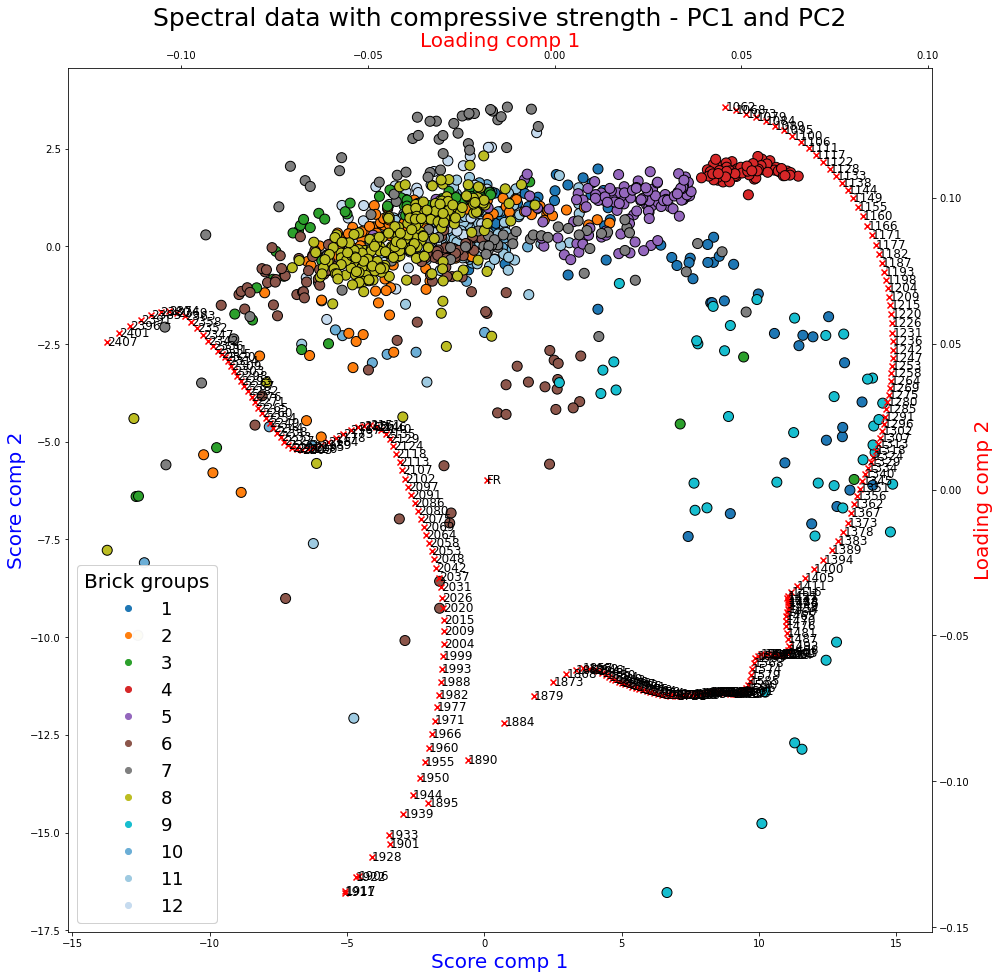

In [16]:
biplot_spectra(scores, 0, 1, loadings, labels=col_names)

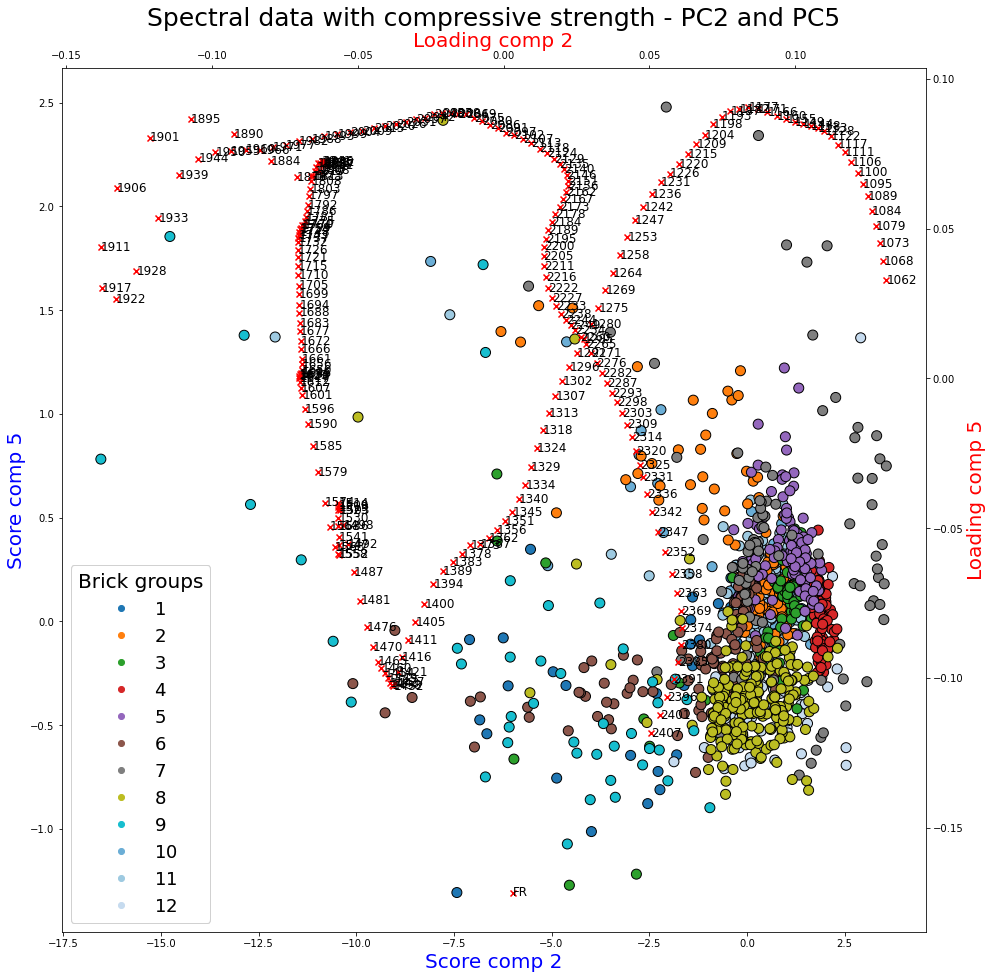

In [18]:
biplot_spectra(scores, 1, 4, loadings, labels=col_names)

In [20]:
# Standardizing
sc = StandardScaler()
sc.fit(fr_df)
df_sc = pd.DataFrame(sc.fit_transform(fr_df),columns = fr_df.columns)
df_sc

C:\Users\marth\anaconda3\envs\inf200\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\marth\anaconda3\envs\inf200\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\marth\anaconda3\envs\inf200\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,1062,1068,1073,1079,1084,1089,1095,1100,1106,1111,...,2363,2369,2374,2380,2385,2391,2396,2401,2407,FR
0,0.637161,0.576766,0.518953,0.459642,0.402123,0.346161,0.294965,0.246575,0.202953,0.162309,...,-0.114125,-0.129469,-0.149634,-0.174030,-0.202571,-0.233828,-0.267012,-0.300882,-0.335457,-0.383462
1,-0.057378,-0.119197,-0.178918,-0.236840,-0.292829,-0.346343,-0.396549,-0.443478,-0.486664,-0.525970,...,0.638105,0.610240,0.584902,0.562545,0.540827,0.518971,0.494952,0.470981,0.445131,-0.372731
2,0.352488,0.293701,0.235353,0.178666,0.125478,0.074512,0.027053,-0.018862,-0.061679,-0.102778,...,0.278780,0.253569,0.229972,0.206553,0.181835,0.157193,0.132030,0.105352,0.078130,-0.380799
3,0.738348,0.681265,0.625431,0.567420,0.510868,0.454799,0.402568,0.352755,0.307563,0.264667,...,-0.111510,-0.130490,-0.152823,-0.178205,-0.207679,-0.239852,-0.273791,-0.308632,-0.344214,-0.328507
4,0.220832,0.158994,0.097733,0.037625,-0.021775,-0.078772,-0.133280,-0.185159,-0.234946,-0.281035,...,0.519826,0.487158,0.457836,0.431322,0.406469,0.381135,0.355191,0.329098,0.301916,-0.368898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,-1.257809,-1.112754,-0.967005,-0.848352,-0.734742,-0.627482,-0.519845,-0.398008,-0.262004,-0.127040,...,-2.900351,-2.888296,-2.849328,-2.778606,-2.681599,-2.569211,-2.436438,-2.298916,-2.147322,-1.232822
1256,-1.055518,-0.873059,-0.698613,-0.533394,-0.368662,-0.205757,-0.051231,0.104912,0.258313,0.404000,...,-3.087087,-3.094462,-3.074022,-3.032829,-2.969476,-2.887880,-2.799897,-2.706801,-2.601497,-1.030738
1257,-3.397726,-3.184573,-2.971396,-2.755220,-2.537593,-2.314735,-2.094861,-1.886707,-1.675798,-1.479940,...,-3.627996,-3.683197,-3.701452,-3.679948,-3.621456,-3.543892,-3.448509,-3.337931,-3.214694,-1.252778
1258,-0.530363,-0.471100,-0.416710,-0.357026,-0.288784,-0.220983,-0.161188,-0.096668,-0.034788,0.022145,...,-2.837792,-2.825661,-2.791511,-2.745497,-2.684758,-2.608813,-2.525059,-2.436212,-2.333419,-1.259959


In [21]:
sc_vals= df_sc.values
sc_col_names = list(df_sc.columns)

sc_model = ho.nipalsPCA(arrX=sc_vals, numComp=5, Xstand=False, cvType=["loo"])

loo


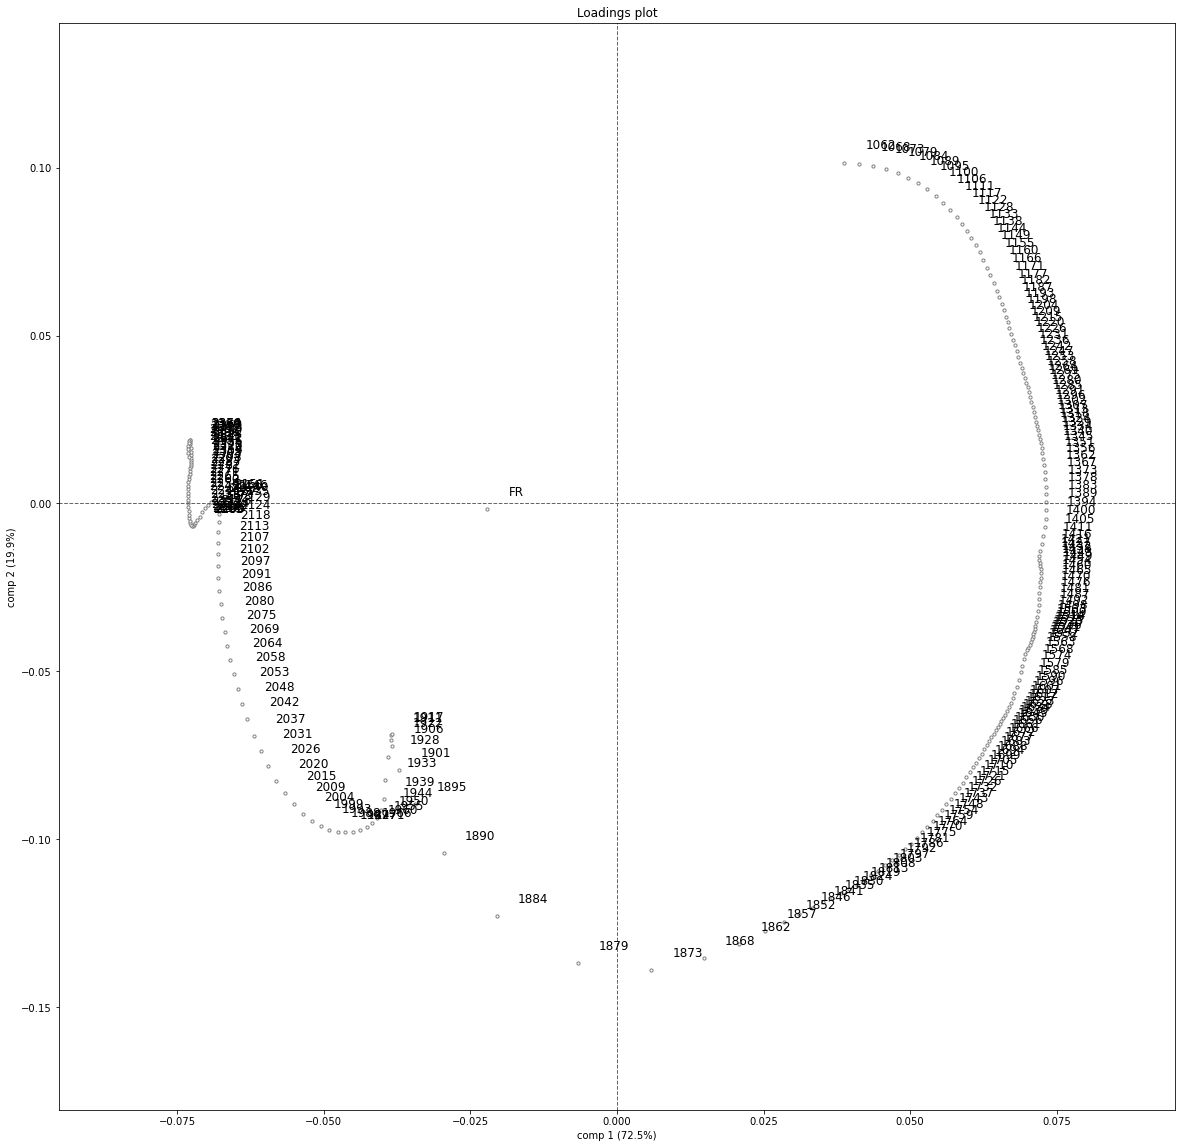

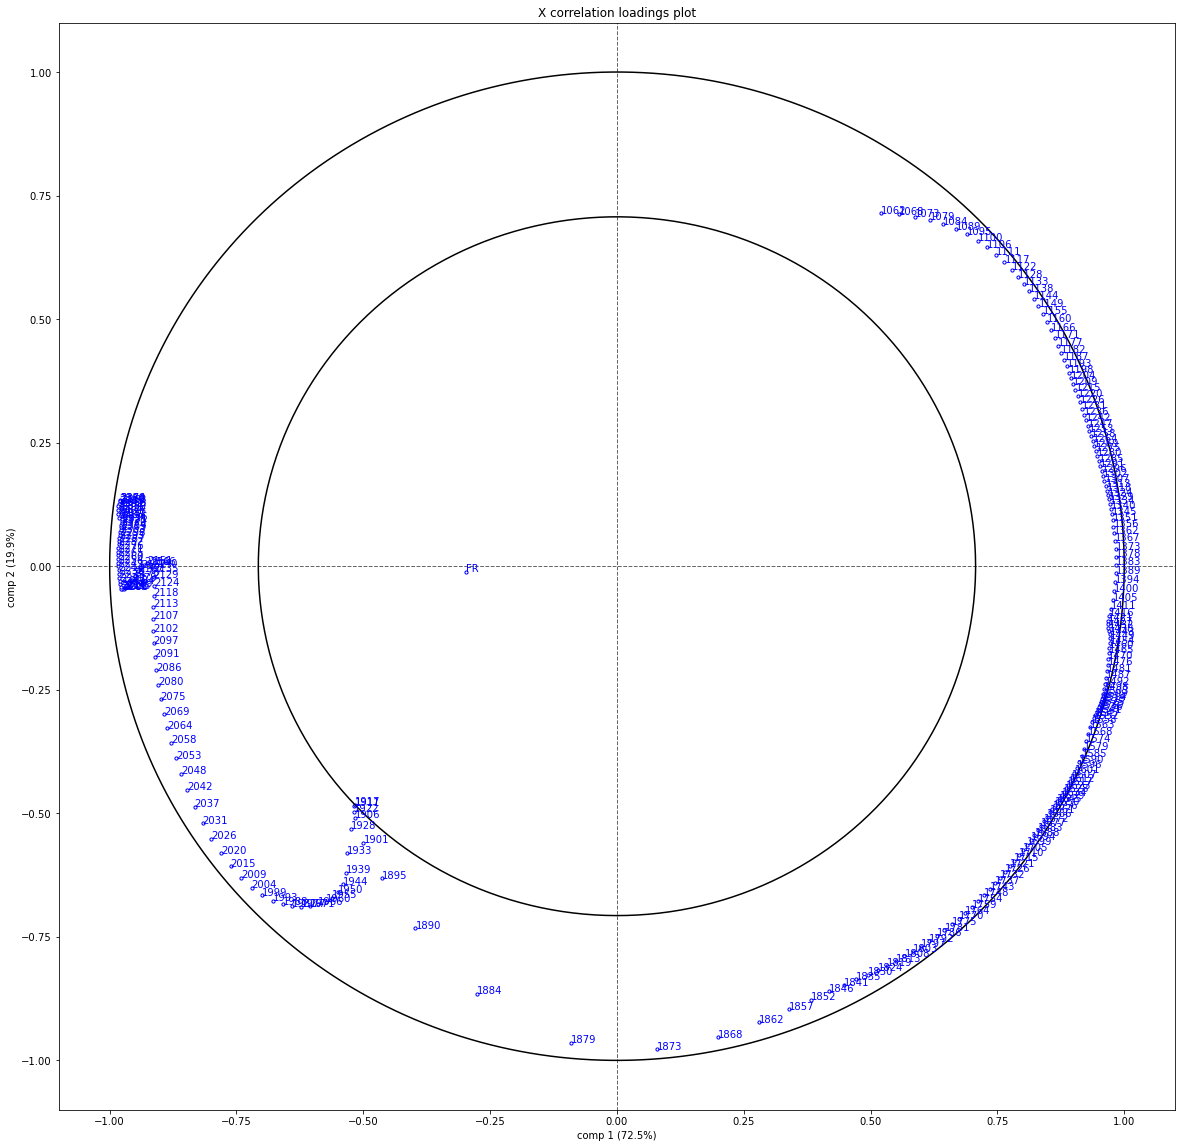

In [22]:
hopl.plot(sc_model, comp=[1, 2], 
         plots=[2, 3], 
         objNames=brick_ids, 
         XvarNames=sc_col_names, figsize=(20,20))

In [23]:
# Get calibrated explained variance of each component
calExplVar = sc_model.X_calExplVar()

# Get calibrated explained variance and store in pandas dataframe with row and column names
calExplVar_df = pd.DataFrame(sc_model.X_calExplVar())
calExplVar_df.columns = ['calibrated explained variance']
calExplVar_df.index = ['PC{0}'.format(x+1) for x in range(sc_model.X_loadings().shape[1])]
calExplVar_df

,calibrated explained variance
PC1,72.540464
PC2,19.893287
PC3,4.097230
PC4,1.469768
PC5,0.716183


In [24]:
sc_loadings = sc_model.X_loadings()
sc_scores = sc_model.X_scores()

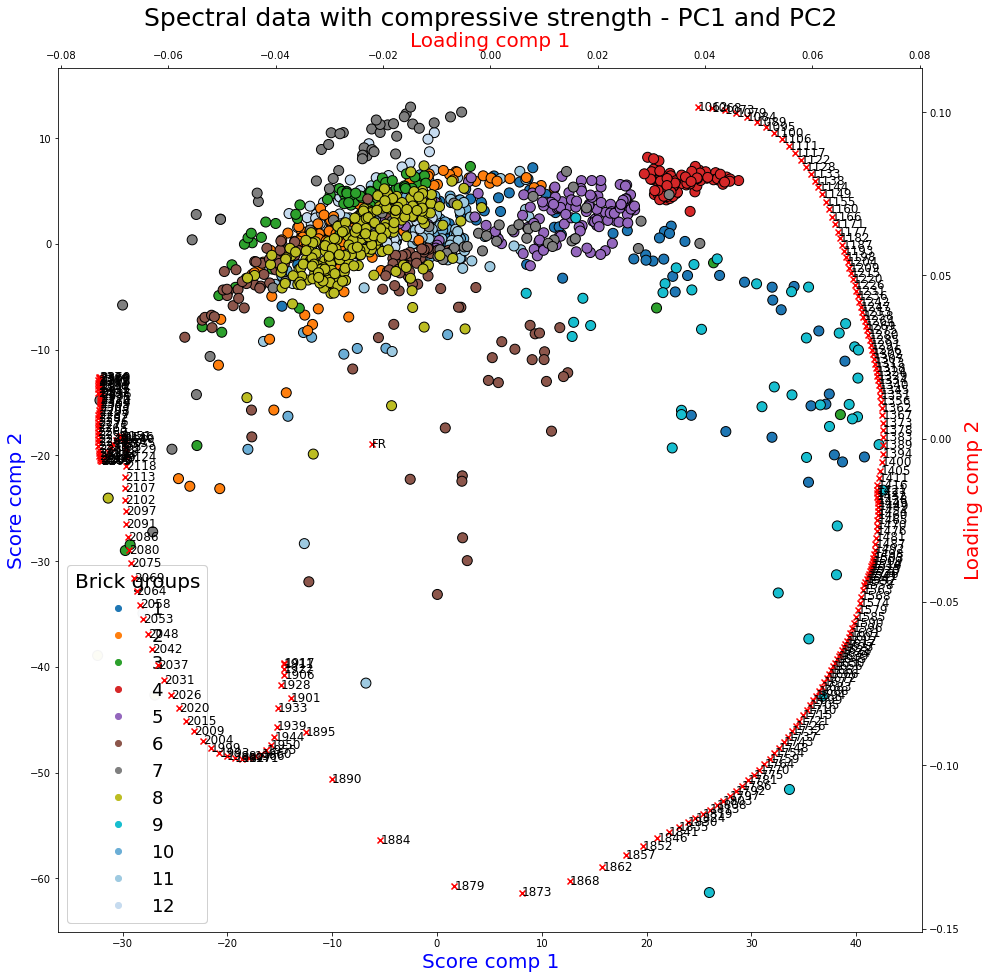

In [25]:
biplot_spectra(sc_scores, 0, 1, sc_loadings, labels=sc_col_names)

In [28]:
# Get loadings and store in pandas dataframe with row and column names
loadings_df = pd.DataFrame(sc_model.X_loadings())
loadings_df.index = sc_col_names
loadings_df.columns = ['PC{0}'.format(x+1) for x in range(sc_model.X_loadings().shape[1])]
loadings_df

,PC1,PC2,PC3,PC4,PC5
1062,0.055723,0.084808,0.025932,0.003155,0.120226
1068,0.056821,0.083883,0.023892,-0.001933,0.113424
1073,0.057916,0.082845,0.021866,-0.006869,0.106375
1079,0.058994,0.081714,0.019821,-0.011896,0.099086
1084,0.060047,0.080493,0.017793,-0.016853,0.091710
...,...,...,...,...,...
2391,-0.081423,0.014905,0.001857,-0.022142,-0.055833
2396,-0.081099,0.016000,0.001266,-0.009999,-0.078387
2401,-0.080601,0.017041,0.000912,0.002755,-0.100269
2407,-0.079972,0.017989,0.000777,0.016093,-0.119672


# PLS model


In [7]:
# Normalizing the target to match the SNV processed spectra

mean_val = fr_df['FR'].mean()
std_dev = fr_df['FR'].std()

fr_df['normalized fr'] = (fr_df['FR'] - mean_val) / std_dev

fr_df

,1062,1068,1073,1079,1084,1089,1095,1100,1106,1111,...,2369,2374,2380,2385,2391,2396,2401,2407,FR,normalized fr
0,1.744566,1.631853,1.524010,1.417335,1.314425,1.214227,1.118951,1.027436,0.941526,0.858801,...,-0.251745,-0.233891,-0.211298,-0.184049,-0.153588,-0.119331,-0.082081,-0.040808,0.547439,-0.383310
1,1.463717,1.350071,1.240531,1.132891,1.028580,0.926922,0.829383,0.735591,0.646862,0.561571,...,0.145795,0.168932,0.201250,0.241630,0.287518,0.338168,0.393329,0.453060,0.550790,-0.372583
2,1.629454,1.517245,1.408810,1.302585,1.200637,1.101526,1.006765,0.915175,0.828452,0.744324,...,-0.045889,-0.025713,0.001863,0.036066,0.075533,0.120262,0.168128,0.220863,0.548271,-0.380647
3,1.785482,1.674163,1.567261,1.461352,1.359154,1.259299,1.164010,1.072343,0.986224,0.903004,...,-0.252293,-0.235639,-0.213636,-0.186974,-0.157118,-0.123401,-0.086854,-0.046349,0.564598,-0.328376
4,1.576216,1.462705,1.352908,1.244983,1.140070,1.037931,0.939626,0.844842,0.754418,0.667345,...,0.079647,0.099248,0.127754,0.164694,0.206753,0.254252,0.305939,0.362449,0.551987,-0.368751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0.978303,0.947799,0.920407,0.883148,0.846815,0.810284,0.777753,0.754822,0.742857,0.733847,...,-1.734413,-1.714414,-1.670096,-1.603571,-1.522017,-1.421896,-1.312720,-1.187152,0.282244,-1.232333
1256,1.060103,1.044847,1.029429,1.011778,0.997389,0.985248,0.973983,0.967522,0.965180,0.963174,...,-1.845212,-1.837637,-1.812484,-1.768414,-1.708743,-1.640124,-1.563946,-1.474503,0.345340,-1.030329
1257,0.112993,0.108959,0.106214,0.104379,0.105273,0.110279,0.118223,0.125203,0.138763,0.149604,...,-2.161614,-2.181722,-2.174929,-2.141745,-2.093136,-2.029563,-1.952675,-1.862464,0.276013,-1.252281
1258,1.272458,1.207592,1.143939,1.083807,1.030244,0.978931,0.927939,0.882268,0.839943,0.798272,...,-1.700751,-1.682707,-1.651552,-1.605380,-1.545222,-1.475106,-1.397284,-1.304893,0.273771,-1.259459


In [8]:
# Not standardized data
train_df, test_df = train_test_split(fr_df, test_size=0.3, random_state=42)


y_train = train_df.iloc[:, 249:]

y_test = test_df.iloc[:, 249:]


X_train = train_df.iloc[:, :-2]

X_test = test_df.iloc[:, :-2]

# Standardized dataset
#train_df, test_df = train_test_split(df_sc, test_size=0.3, random_state=42)
#
#y_train = train_df.iloc[:, 248:]
#y_test = test_df.iloc[:, 248:]
#
#X_train = train_df.iloc[:, :-1]
#X_test = test_df.iloc[:, :-1]


In [248]:
y_test

,normalized fr
1201,-0.328515
115,-0.423467
979,1.457062
175,-0.606131
63,-0.410322
...,...
292,1.020787
1299,-1.108626
464,-0.852531
141,-0.614962


In [246]:
original_y_test = test_df.iloc[:, 248:]
original_y_test

,FR,normalized fr
1201,0.562318,-0.328515
115,0.533050,-0.423467
979,1.112694,1.457062
175,0.476747,-0.606131
63,0.537102,-0.410322
...,...,...
292,0.978219,1.020787
1299,0.321861,-1.108626
464,0.400798,-0.852531
141,0.474025,-0.614962


In [10]:
# obs tar lang tid å kjøre denne gridsearchen
parameters = {'plsregression__n_components': [9, 10,12]}

pls_model = make_pipeline(PLSRegression())

gs = GridSearchCV(estimator=pls_model,
                 param_grid = parameters,
                 cv=10,
                 n_jobs=-1,
                 verbose=2,
                 scoring='neg_mean_squared_error')
    
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)



NameError: name 'make_pipeline' is not defined

In [53]:
pls = PLSRegression(n_components=10, scale=False)
pls.fit(X_train, y_train)

PLSRegression(n_components=10, scale=False)

In [54]:
pls.score(X_test, y_test)

0.44972479259358944

In [56]:
y_pred = pls.predict(X_test)

In [65]:
y_pred

array([[ 7.03822261e-01],
       [ 2.32590375e-01],
       [-1.06003104e-01],
       [-4.60259913e-02],
       [-2.96069020e-01],
       [-6.16666435e-01],
       [ 2.94641744e-01],
       [-1.15017270e+00],
       [-3.44163480e-01],
       [-4.56195195e-01],
       [-6.14804534e-01],
       [ 2.18435894e+00],
       [ 1.61086543e-01],
       [-3.99856419e-01],
       [ 2.15613903e-01],
       [-4.05634025e-01],
       [-1.31379924e+00],
       [ 5.19785482e-01],
       [ 3.29727841e-01],
       [-6.41919967e-01],
       [ 1.20528659e+00],
       [-9.78242330e-01],
       [-2.39062999e-01],
       [ 6.83153221e-01],
       [ 5.24511677e-01],
       [-5.39447359e-01],
       [ 2.16041764e-01],
       [-4.13855118e-01],
       [-4.80821806e-01],
       [-2.24595187e-01],
       [ 5.69138584e-01],
       [ 4.33500526e-01],
       [-5.09756425e-01],
       [-3.07888480e-01],
       [ 7.48924452e-01],
       [ 5.30220134e-01],
       [-4.66163500e-01],
       [ 7.66356272e-01],
       [ 1.8

In [253]:
res = y_test-y_pred
res

,normalized fr
1201,-0.645092
115,-0.339374
979,0.387882
175,-0.099900
63,-0.342258
...,...
292,0.971846
1299,-0.605968
464,-0.411788
141,-0.450211


In [57]:
print('mean_squared_error : ', mean_squared_error(y_test, y_pred, squared=True))
print('RMSE: ', mean_squared_error(y_test, y_pred, squared=False))
print('mean_absolute_error : ', mean_absolute_error(y_test, y_pred))
print('R_squared : ', r2_score(y_test, y_pred))
print('Explained variation :', explained_variance_score(y_test, y_pred))

mean_squared_error :  0.5826446082170266
RMSE:  0.7633116062376011
mean_absolute_error :  0.5939715839954152
R_squared :  0.44972479259358944
Explained variation : 0.45228180081332825


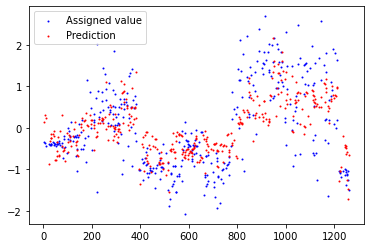

In [185]:
plt.scatter(x= X_test.index, y = y_test, s =1, color = 'blue', label = 'Assigned value')
plt.scatter(x= X_test.index, y = y_pred, s =1, color = 'red', label = 'Prediction')
plt.legend()

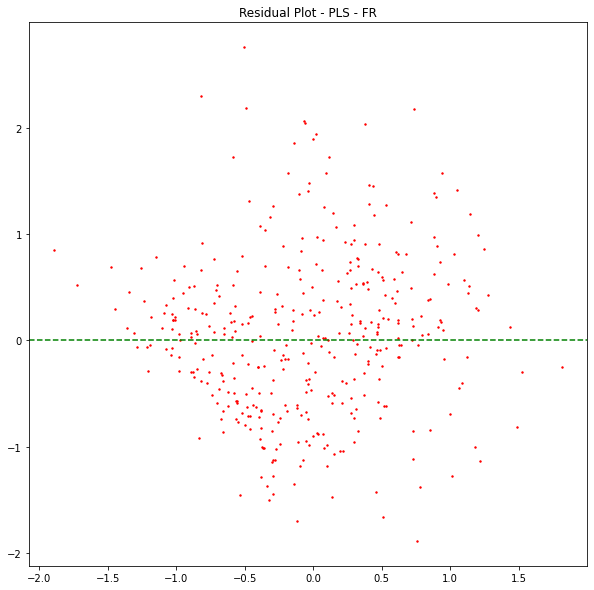

In [58]:
residuals = y_test-y_pred
plt.figure(figsize=(10,10))
plt.title("Residual Plot - PLS - FR")
plt.axhline(y=0, color='green', linestyle='--')
plt.scatter(x = y_pred, y = residuals, s = 2, color = 'red')


Altså, predicta den 80, og hadde truffet, hadde en prikkkligget akkurat på (80, 0). Skulle vært en rett linje på y-aksen lik 0 hvis dette var optimalt. Det er det ikke. Veldig få verdier predicted i lavere verdiområde. Kanskje fordi treningsdataen er så tungt vekta på midtkvalitetssteiner og oppover. 

# Turn normalized value back to actual value



In [59]:
# obs should have std and mean from training data?
# or use the mean and standard deviation used to standardize the full dataset, the x_train and x_test combined.
y_pred_inverse = (y_pred*std_dev) + mean_val
y_test_inverse = (y_test*std_dev) + mean_val

y_pred_inverse

array([[0.97566084],
       [0.63068727],
       [0.8535952 ],
       [0.62479035],
       [0.52629493],
       [0.52951761],
       [0.86263677],
       [1.02891261],
       [0.84950485],
       [0.78663595],
       [0.94000405],
       [0.5878331 ],
       [0.55710497],
       [0.95511874],
       [0.51724119],
       [0.50324041],
       [0.49130714],
       [0.8069423 ],
       [0.63607258],
       [0.41887484],
       [0.82505172],
       [0.85586922],
       [0.75186308],
       [0.8162319 ],
       [0.72011192],
       [0.65742287],
       [0.25180655],
       [0.98159663],
       [0.45231127],
       [0.98731128],
       [0.36949765],
       [0.77701463],
       [0.72252295],
       [0.40908915],
       [0.58936209],
       [0.29070791],
       [0.7484312 ],
       [0.37585305],
       [0.49092322],
       [0.88854124],
       [0.75076597],
       [0.71300899],
       [0.67376425],
       [1.13170864],
       [0.59222877],
       [0.63463559],
       [0.53073536],
       [0.922

In [60]:
print('mean_squared_error : ', mean_squared_error(y_test_inverse, y_pred_inverse, squared=True))
print('RMSE: ', mean_squared_error(y_test_inverse, y_pred_inverse, squared=False))
print('mean_absolute_error : ', mean_absolute_error(y_test_inverse, y_pred_inverse))
print('R_squared : ', r2_score(y_test_inverse, y_pred_inverse))
print('Explained variation :', explained_variance_score(y_test_inverse, y_pred_inverse))

mean_squared_error :  0.054217766635120804
RMSE:  0.2328470885261845
mean_absolute_error :  0.18119016253706413
R_squared :  0.44972479259358944
Explained variation : 0.45228180081332836


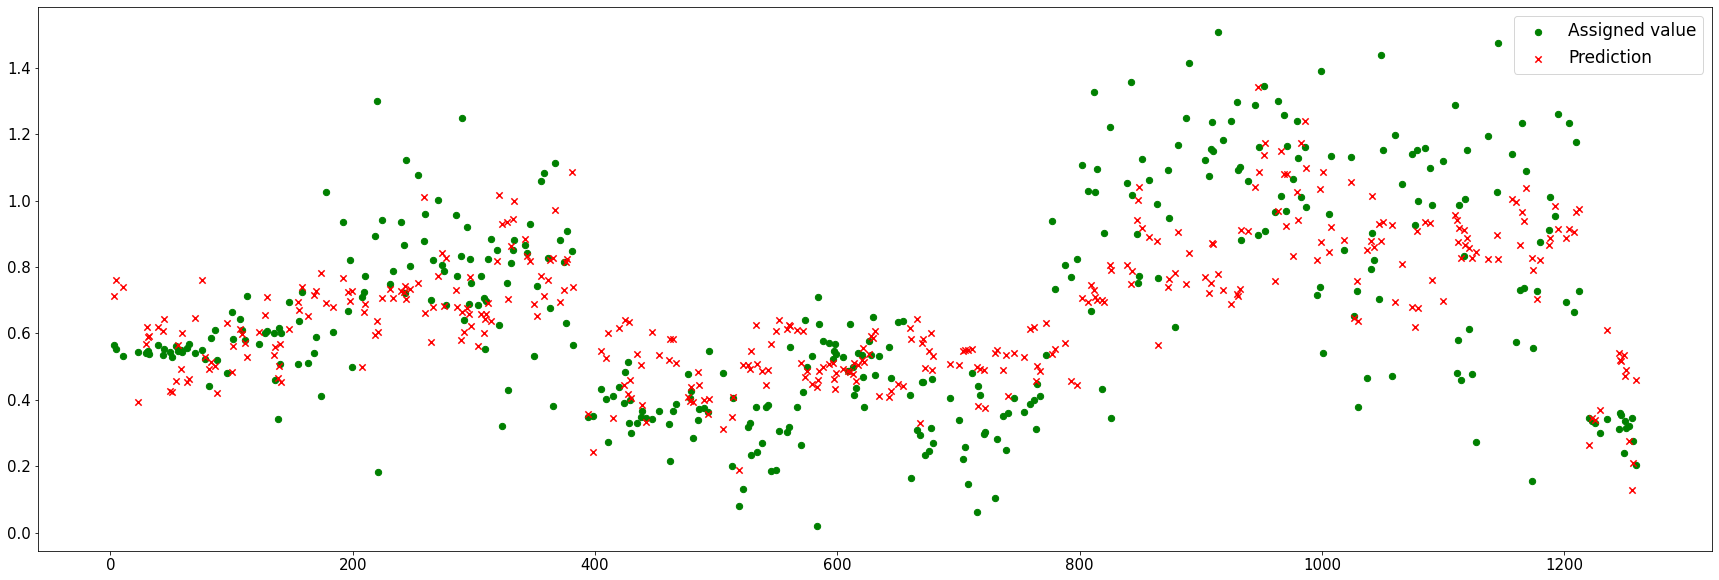

In [204]:
plt.figure(figsize=(30,10))
plt.scatter(x= X_test.index, y = y_test_inverse, s =40, color = 'green', label = 'Assigned value')
plt.scatter(x= X_test.index, y = y_pred_inverse, s =40, color = 'red', marker='x', label = 'Prediction')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=17)

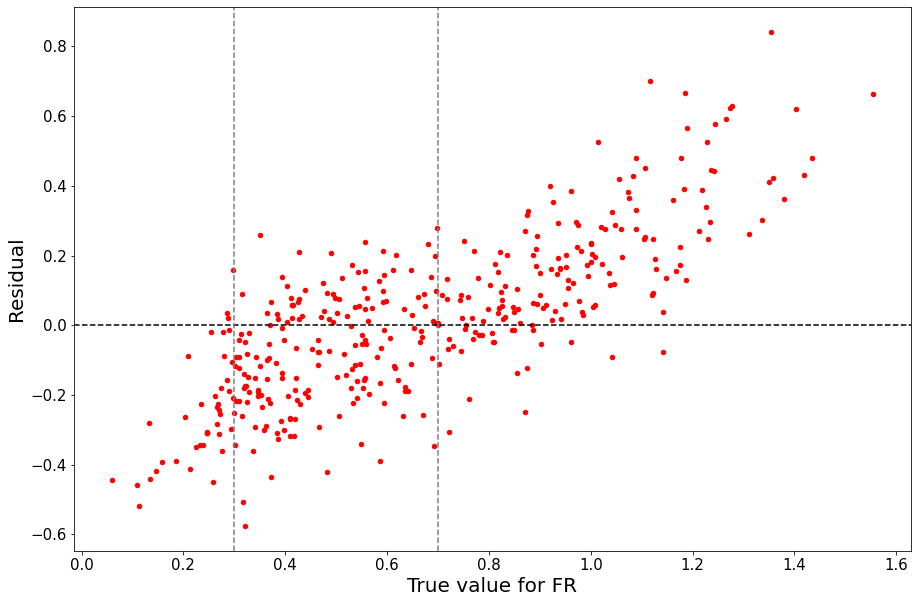

In [61]:
residuals = y_test_inverse-y_pred_inverse
plt.figure(figsize=(15,10))
#plt.title("Residual Plot - PLS - FR")
plt.xlabel('True value for FR', fontsize=20)
plt.ylabel('Residual', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axhline(y=0, color='black', linestyle='--')
plt.axvline(x=0.3, color="gray", linestyle='--')
plt.axvline(x=0.7, color="gray", linestyle='--')
plt.scatter(x = y_test_inverse, y = residuals, s = 20, color = 'red')

# Pipeline with PCA and another predictor



In [9]:
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV


In [10]:
# Testing SVR
parameters = {'svr__kernel': ["rbf"], 'svr__C': [6,7,8], 'svr__epsilon': [0.3, 0.1, 0]}

svr_model = make_pipeline(PCA(n_components=10), svm.SVR(gamma='auto'))

gs = GridSearchCV(estimator=svr_model,
                 param_grid = parameters,
                 cv=10,
                 n_jobs=-1,
                 verbose=2,
                 scoring='neg_mean_squared_error')
    
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


C:\Users\marth\anaconda3\envs\inf200\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.5212570788423525
{'svr__C': 6, 'svr__epsilon': 0.1, 'svr__kernel': 'rbf'}


In [10]:
svr_model = make_pipeline(PCA(n_components=10), svm.SVR(kernel='rbf', epsilon=0.3, C=8, gamma='auto'))


# fitting the model
svr_model.fit(X_train, y_train)
  
# making predictions
y_pred_svc = svr_model.predict(X_test)

C:\Users\marth\anaconda3\envs\inf200\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
svr_model.score(X_test, y_test)

0.5515663212546522

In [266]:
print('mean_squared_error : ', mean_squared_error(y_test, y_pred_svc, squared=True))
print('RMSE: ', mean_squared_error(y_test, y_pred_svc, squared=False))
print('mean_absolute_error : ', mean_absolute_error(y_test, y_pred_svc))
print('R_squared : ', r2_score(y_test, y_pred_svc))
print('Explained variation :', explained_variance_score(y_test, y_pred_svc))

mean_squared_error :  0.6323679969703008
RMSE:  0.7952156921051676
mean_absolute_error :  0.5808851290575654
R_squared :  0.38687153261257246
Explained variation : 0.3883557267640648


In [13]:
y_pred_svc_inverse = (y_pred_svc*std_dev) + mean_val
y_test_inverse = (y_test*std_dev) + mean_val

new_pred_array = []
for i in range(len(y_pred_svc_inverse)):
    new_pred_array.append([y_pred_svc_inverse[i]])
    
#new_pred_array

In [68]:
print('mean_squared_error : ', mean_squared_error(y_test_inverse, y_pred_svc_inverse, squared=True))
print('RMSE: ', mean_squared_error(y_test_inverse, y_pred_svc_inverse, squared=False))
print('mean_absolute_error : ', mean_absolute_error(y_test_inverse, y_pred_svc_inverse))
print('R_squared : ', r2_score(y_test_inverse, y_pred_svc_inverse))
print('Explained variation :', explained_variance_score(y_test_inverse, y_pred_svc_inverse))

mean_squared_error :  0.04723748839449444
RMSE:  0.21734186986058263
mean_absolute_error :  0.16475485304977913
R_squared :  0.5205700946965902
Explained variation : 0.5273440382471134


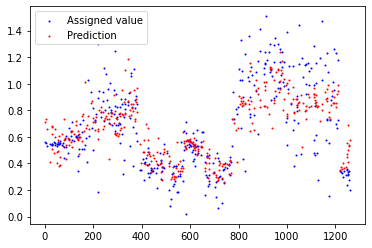

In [172]:
plt.scatter(x= X_test.index, y = y_test_inverse, s =1, color = 'blue', label = 'Assigned value')
plt.scatter(x= X_test.index, y =new_pred_array, s =1, color = 'red', label = 'Prediction')
plt.legend()

In [14]:
y_test_inverse = y_test_inverse.reset_index(drop=True)
pred_df = pd.DataFrame(new_pred_array, columns=['Pred value'])
residuals = y_test_inverse['normalized fr']-pred_df['Pred value']
residuals

0      0.013158
1     -0.203924
2     -0.042774
3     -0.049542
4     -0.084198
         ...   
373   -0.020905
374   -0.333551
375    0.189312
376    0.333597
377   -0.237883
Length: 378, dtype: float64

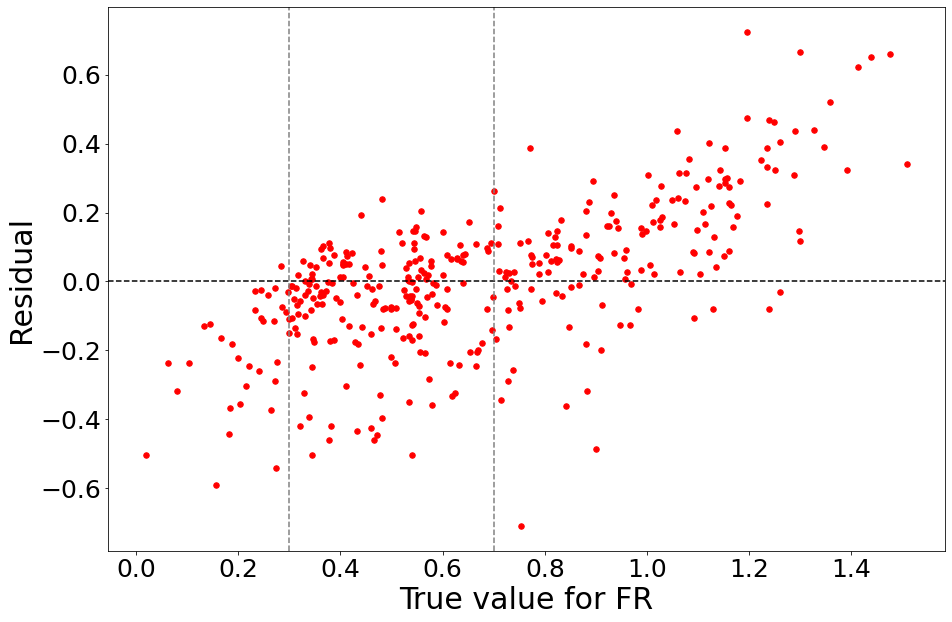

In [15]:
#residuals = y_test_inverse-new_pred_array
#plt.figure(figsize=(15,10))
#plt.title("Residual Plot - SVR - FR")
#plt.axhline(y=0, color='green', linestyle='--')
#plt.scatter(x = pred_df['Pred value'], y = residuals, s = 10, color = 'red')
#

plt.figure(figsize=(15,10))
#plt.title("Residual Plot - PLS - FR")
plt.xlabel('True value for FR', fontsize=30)
plt.ylabel('Residual', fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.axhline(y=0, color='black', linestyle='--')
plt.axvline(x=0.3, color="gray", linestyle='--')
plt.axvline(x=0.7, color="gray", linestyle='--')
plt.scatter(x = y_test_inverse, y = residuals, s = 30, color = 'red')